In [1]:
###########################################
# setting1  undersampled all              #
#                                         #
# setting 2 undersampled training         #
###########################################
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import numpy as np
import statsmodels.api as sm
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import torch
from torch.utils.data import DataLoader
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score


In [3]:
###########################################################
#    undersampled , undersample training only  
#
#                        PROJECT Report 1 RUN 5
#
###########################################################
x_train_undersampled = np.loadtxt("preprocessed/x_train_resampled.csv", delimiter=',')
y_train_undersampled = np.loadtxt("preprocessed/y_train_resampled.csv", delimiter=',')
x_valid=np.loadtxt("preprocessed/x_valid.csv",delimiter=",")
y_valid=np.loadtxt("preprocessed/y_valid.csv",delimiter=",")
x_test=np.loadtxt("preprocessed/x_test.csv",delimiter=",")
y_test=np.loadtxt("preprocessed/y_test.csv",delimiter=",")

In [54]:
clf = RandomForestClassifier()
clf.fit(x_train_undersampled, y_train_undersampled)

RandomForestClassifier()

In [55]:
acc = np.zeros((20,20))  # store accuracy 
for i in range(20):
     for j in range(20):
         clf = RandomForestClassifier(max_depth = i+1, max_leaf_nodes=j+2)
         clf.fit(x_valid, y_valid)
         y_pred = clf.predict(x_valid)
         acc[i,j] = accuracy_score(y_valid, y_pred)

best_mod = np.where(acc == acc.max())
print (best_mod)
print (acc[best_mod])

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 1

In [56]:
n_estimators_list=range(1,2000,100)
record=[]
for n_estimators in n_estimators_list:
    clf=RandomForestClassifier(n_estimators=n_estimators)
    r2=cross_val_score( clf, x_train_undersampled, y_train_undersampled, scoring='r2').mean()#cv=5
    record.append(r2)

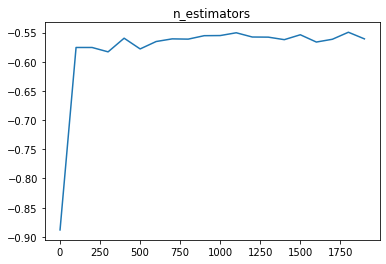

The best parameter: 1801


In [57]:
plt.plot(n_estimators_list,record)
plt.title('n_estimators')
plt.show()
print('The best parameter:',n_estimators_list[np.array(record).argsort()[-1:][0]])

In [82]:
split_index = [-1]*len(x_train) + [0]*len(x_valid)
X = np.concatenate((x_train, x_valid), axis=0)
y = np.concatenate((y_train, y_valid), axis=0)
pds = PredefinedSplit(test_fold = split_index)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [100, 150,200],
    'max_features': [11,12],
    'min_samples_leaf': [15,20],
    'min_samples_split': [12,20],
    'n_estimators': [1000,1800]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
#grid_search = GridSearchCV(scoring="recall",estimator = rf, param_grid = param_grid, 
#                          cv = pds, n_jobs = -1, verbose = 2)
#grid_search.fit(x_train_undersampled, y_train_undersampled)
#grid_search.fit(x, y)
clf = GridSearchCV(scoring="recall",estimator=rf,cv=pds,param_grid=param_grid)

# Fit with all data
clf.fit(X, y)

In [50]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 11,
 'min_samples_leaf': 20,
 'min_samples_split': 12,
 'n_estimators': 1000}

In [4]:
###############################
#    n_estimators=1800        #
########################################################################################
#    undersampled x_train,y_train, no undersampling on scaled_x_test,not scaled_y test #
#######################################################################################
randomforest = RandomForestClassifier(bootstrap=True,n_estimators=1000,max_depth=100,max_features=11,min_samples_leaf=20,min_samples_split=12)
randomforest.fit(x_train_undersampled, y_train_undersampled)
y_pred = randomforest.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.60      0.73      8432
         1.0       0.17      0.63      0.27      1136

    accuracy                           0.60      9568
   macro avg       0.55      0.61      0.50      9568
weighted avg       0.83      0.60      0.67      9568



In [5]:
from sklearn.metrics import roc_auc_score
print("ROC_AUC_score",roc_auc_score(y_test,y_pred,average=None))

ROC_AUC_score 0.6137651334954699


D:\anacod\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0, 0.5, 'True Positive Rate')

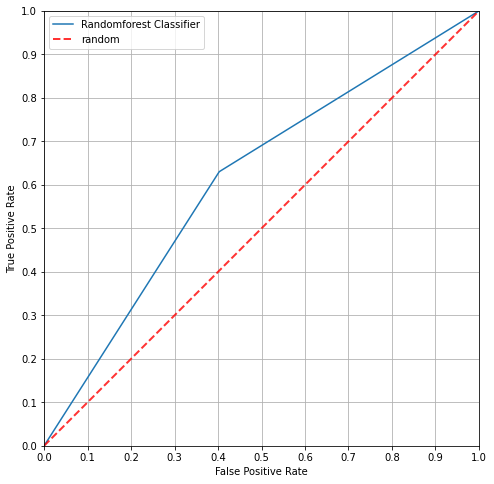

In [6]:
##############
# ROC Curve #
#############
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test, y_pred)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='Randomforest Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(0.5, 1.0, 'Accuracy Score: 0.6011705685618729')

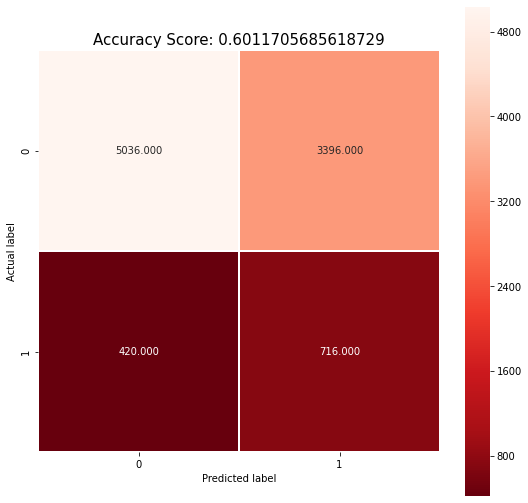

In [7]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(randomforest.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

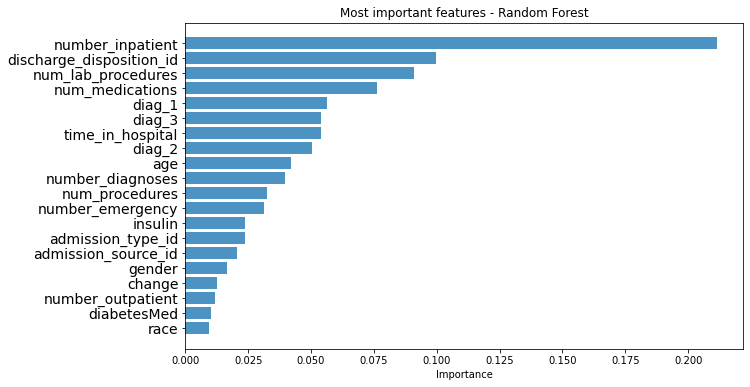

In [25]:
feature_names = df.columns
feature_imports = randomforest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(20, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

In [ ]:
###################################2#################################

In [26]:
randomforest = RandomForestClassifier(bootstrap=True,n_estimators=1000,max_depth=100,max_features=3,min_samples_leaf=5,min_samples_split=10)
randomforest.fit(x_train_undersampled, y_train_undersampled)
y_pred = randomforest.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("ROC_AUC_score",roc_auc_score(y_test,y_pred,average=None))

              precision    recall  f1-score   support

         0.0       0.92      0.60      0.73      8432
         1.0       0.17      0.63      0.27      1136

    accuracy                           0.60      9568
   macro avg       0.55      0.61      0.50      9568
weighted avg       0.83      0.60      0.67      9568

ROC_AUC_score 0.6140115121468851


D:\anacod\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0, 0.5, 'True Positive Rate')

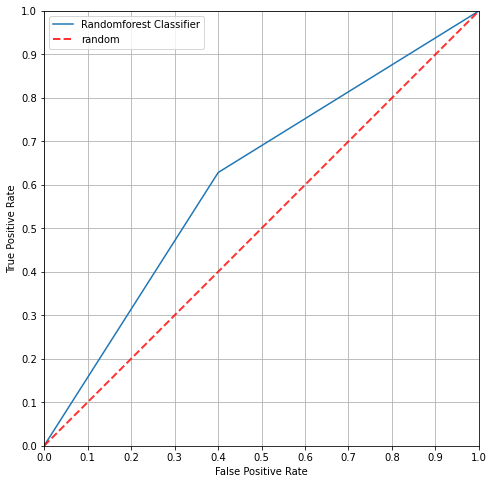

In [27]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test, y_pred)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='Randomforest Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(0.5, 1.0, 'Accuracy Score: 0.6029473244147158')

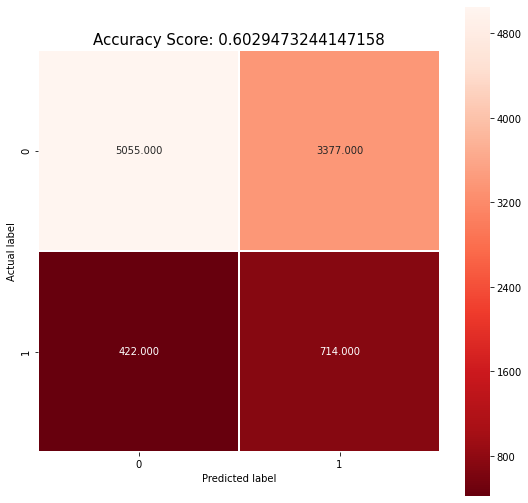

In [28]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(randomforest.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

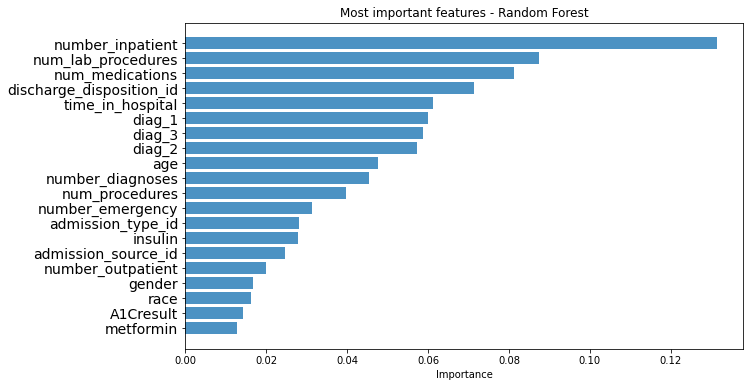

In [41]:
feature_names = df.columns
feature_imports = randomforest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(20, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

In [ ]:
############################################################################################3
#                                      3
###########################################################################################

In [34]:
randomforest = RandomForestClassifier(bootstrap=True,n_estimators=1000,max_depth=100,max_features=3,min_samples_leaf=5,min_samples_split=10)
randomforest.fit(x_train_undersampled, y_train_undersampled)
y_pred = randomforest.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("ROC_AUC_score",roc_auc_score(y_test,y_pred,average=None))

              precision    recall  f1-score   support

         0.0       0.92      0.60      0.73      8432
         1.0       0.17      0.63      0.27      1136

    accuracy                           0.60      9568
   macro avg       0.55      0.61      0.50      9568
weighted avg       0.83      0.60      0.67      9568

ROC_AUC_score 0.6130969880001069


Text(0.5, 1.0, 'Accuracy Score: 0.6020066889632107')

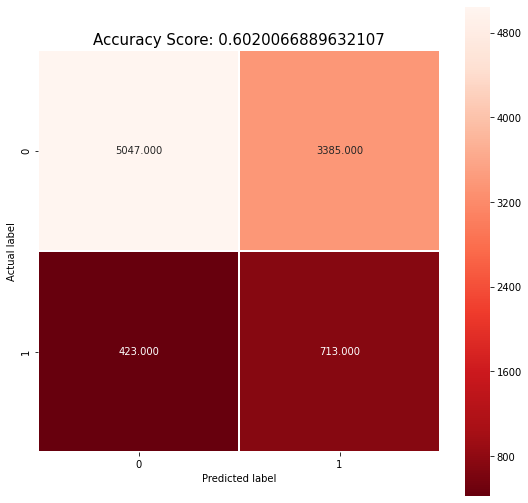

In [35]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(randomforest.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

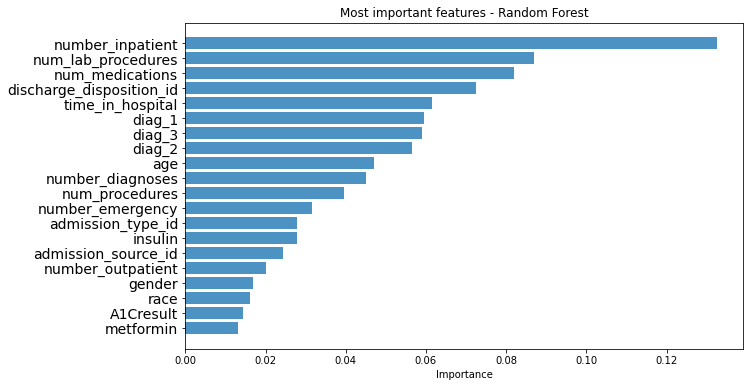

In [30]:
feature_names = df.columns
feature_imports = randomforest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(20, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

In [36]:
############################################################################################3
#                                      4
###########################################################################################
randomforest = RandomForestClassifier(n_estimators=1000,max_depth=100,max_features=3,min_samples_leaf=5,min_samples_split=10)
randomforest.fit(x_train_undersampled, y_train_undersampled)
y_pred = randomforest.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("ROC_AUC_score",roc_auc_score(y_test,y_pred,average=None))

              precision    recall  f1-score   support

         0.0       0.92      0.60      0.73      8432
         1.0       0.18      0.63      0.27      1136

    accuracy                           0.60      9568
   macro avg       0.55      0.62      0.50      9568
weighted avg       0.83      0.60      0.67      9568

ROC_AUC_score 0.615899858353155


Text(0.5, 1.0, 'Accuracy Score: 0.604933110367893')

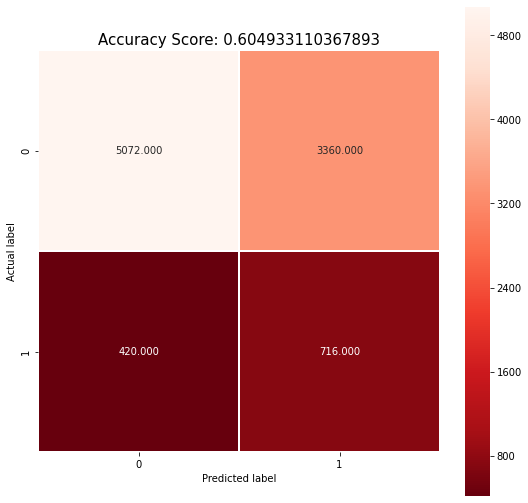

In [37]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(randomforest.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

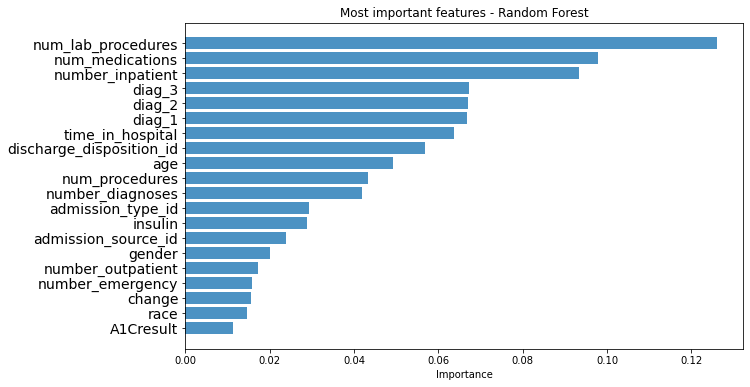

In [56]:
feature_names = df.columns
feature_imports = randomforest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(20, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

In [32]:
############################################################################################3
#                                      5
###########################################################################################
randomforest = RandomForestClassifier(n_estimators=1000,max_depth=100,max_features=3,min_samples_leaf=5,min_samples_split=10)
randomforest.fit(x_train_undersampled, y_train_undersampled)
y_pred = randomforest.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("ROC_AUC_score",roc_auc_score(y_test,y_pred,average=None))

              precision    recall  f1-score   support

         0.0       0.92      0.60      0.73      8432
         1.0       0.17      0.63      0.27      1136

    accuracy                           0.60      9568
   macro avg       0.55      0.61      0.50      9568
weighted avg       0.83      0.60      0.67      9568

ROC_AUC_score 0.6136056137584521


In [33]:
randomforest.score(x_test, y_test)

0.603574414715719

In [42]:
recall_score(y_test, y_pred, average=None)

array([0.60151803, 0.63028169])

In [44]:
import os
dir_pred = 'prediction'
os.makedirs(dir_pred, exist_ok=True)
np.savetxt(os.path.join(dir_pred, 'rf_y_test.txt'), y_test)
np.savetxt(os.path.join(dir_pred, 'rf_yhat_test.txt'), y_pred)

In [ ]:
###############################################
#          oversample training only           #
#
#                 report                      #
################################################

In [10]:
x_train_ot=np.loadtxt("preprocessedoversampled/x_train_oversampled.csv", delimiter=",")
y_train_ot=np.loadtxt("preprocessedoversampled/y_train_oversampled.csv", delimiter=",")
x_test_ot=np.loadtxt("preprocessedoversampled/x_test.csv", delimiter=",")
y_test_ot=np.loadtxt("preprocessedoversampled/y_test.csv", delimiter=",")
x_valid_ot=np.loadtxt("preprocessedoversampled/x_valid.csv", delimiter=",")
y_valid_ot=np.loadtxt("preprocessedoversampled/y_valid.csv", delimiter=",")

In [72]:
randomforest = RandomForestClassifier()
randomforest.fit(x_train_ot, y_train_ot)
y_pred_ot = randomforest.predict(x_test_ot)

In [73]:
print(metrics.classification_report(y_test_ot, y_pred_ot))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      8432
         1.0       0.53      0.02      0.04      1136

    accuracy                           0.88      9568
   macro avg       0.71      0.51      0.49      9568
weighted avg       0.84      0.88      0.83      9568



Text(0.5, 1.0, 'Accuracy Score: 0.8815844481605352')

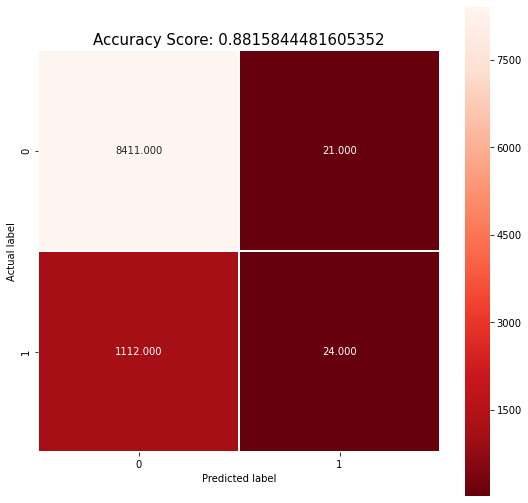

In [74]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test_ot, y_pred_ot), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(randomforest.score(x_test_ot, y_test_ot))
plt.title(all_sample_title, size = 15)

In [75]:
print("ROC_AUC_score",roc_auc_score(y_test_ot,y_pred_ot,average=None))

ROC_AUC_score 0.5093181241147072


In [ ]:
###############################################
#          No resample                     #
#
#                 report                      #
################################################

In [44]:
x_train=np.loadtxt("preprocessed/x_train.csv", delimiter=",")
y_train=np.loadtxt("preprocessed/y_train.csv", delimiter=",")
x_test=np.loadtxt("preprocessed/x_test.csv", delimiter=",")
y_test=np.loadtxt("preprocessed/y_test.csv", delimiter=",")
x_valid=np.loadtxt("preprocessed/x_valid.csv", delimiter=",")
y_valid=np.loadtxt("preprocessed/y_valid.csv", delimiter=",")

In [45]:
randomforest = RandomForestClassifier(bootstrap=True,n_estimators=1800,max_depth=150,max_features=11,min_samples_leaf=10,min_samples_split=12)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      8432
         1.0       0.33      0.00      0.00      1136

    accuracy                           0.88      9568
   macro avg       0.61      0.50      0.47      9568
weighted avg       0.82      0.88      0.83      9568



In [46]:
from sklearn.metrics import roc_auc_score
print("ROC_AUC_score",roc_auc_score(y_test,y_pred,average=None))

ROC_AUC_score 0.5003215450196434


D:\anacod\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0, 0.5, 'True Positive Rate')

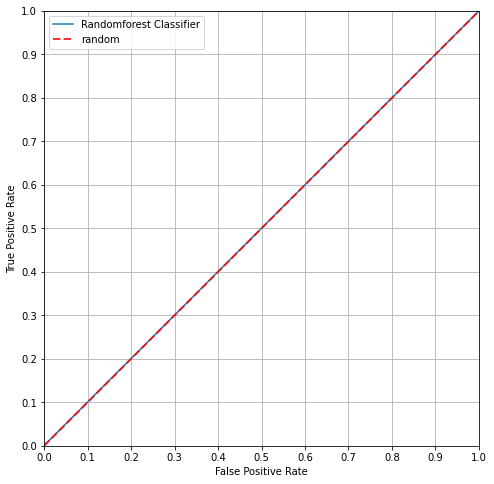

In [47]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test, y_pred)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='Randomforest Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [12]:
randomforest = RandomForestClassifier(bootstrap=True,n_estimators=1800,max_depth=150,max_features=11,min_samples_leaf=10,min_samples_split=12)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("ROC_AUC_score",roc_auc_score(y_test,y_pred,average=None))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      8432
         1.0       0.33      0.00      0.00      1136

    accuracy                           0.88      9568
   macro avg       0.61      0.50      0.47      9568
weighted avg       0.82      0.88      0.83      9568

ROC_AUC_score 0.5003215450196434


In [13]:
randomforest = RandomForestClassifier(bootstrap=True,n_estimators=1800,max_depth=150,max_features=11,min_samples_leaf=10,min_samples_split=12)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("ROC_AUC_score",roc_auc_score(y_test,y_pred,average=None))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      8432
         1.0       0.33      0.00      0.00      1136

    accuracy                           0.88      9568
   macro avg       0.61      0.50      0.47      9568
weighted avg       0.82      0.88      0.83      9568

ROC_AUC_score 0.5003215450196434


In [14]:
randomforest = RandomForestClassifier(bootstrap=True,n_estimators=1800,max_depth=150,max_features=11,min_samples_leaf=10,min_samples_split=12)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("ROC_AUC_score",roc_auc_score(y_test,y_pred,average=None))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      8432
         1.0       0.50      0.00      0.00      1136

    accuracy                           0.88      9568
   macro avg       0.69      0.50      0.47      9568
weighted avg       0.84      0.88      0.83      9568

ROC_AUC_score 0.5007616858647139


In [15]:
randomforest = RandomForestClassifier(bootstrap=True,n_estimators=1800,max_depth=150,max_features=11,min_samples_leaf=10,min_samples_split=12)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("ROC_AUC_score",roc_auc_score(y_test,y_pred,average=None))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      8432
         1.0       0.33      0.00      0.00      1136

    accuracy                           0.88      9568
   macro avg       0.61      0.50      0.47      9568
weighted avg       0.82      0.88      0.83      9568

ROC_AUC_score 0.5003215450196434


In [9]:
missing_values = ["n/a", "na", "--","?"]
df1= pd.read_csv("data/diabetic_data.csv",index_col=0, parse_dates=True,na_values = missing_values)
#df1["diag_1"]=df1["diag_1"].str.replace("250","YES")

D:\anacod\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
missing_values = ["n/a", "na", "--","?"]
df= pd.read_csv("data/diabetic_data.csv",index_col=0, parse_dates=True,na_values = missing_values)
df["readmitted"].replace({">30": "NO"}, inplace=True)
df["readmitted"].replace({"<30": "Yes"}, inplace=True)

D:\anacod\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\anacod\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\anacod\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
D:\anacod\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The colNu

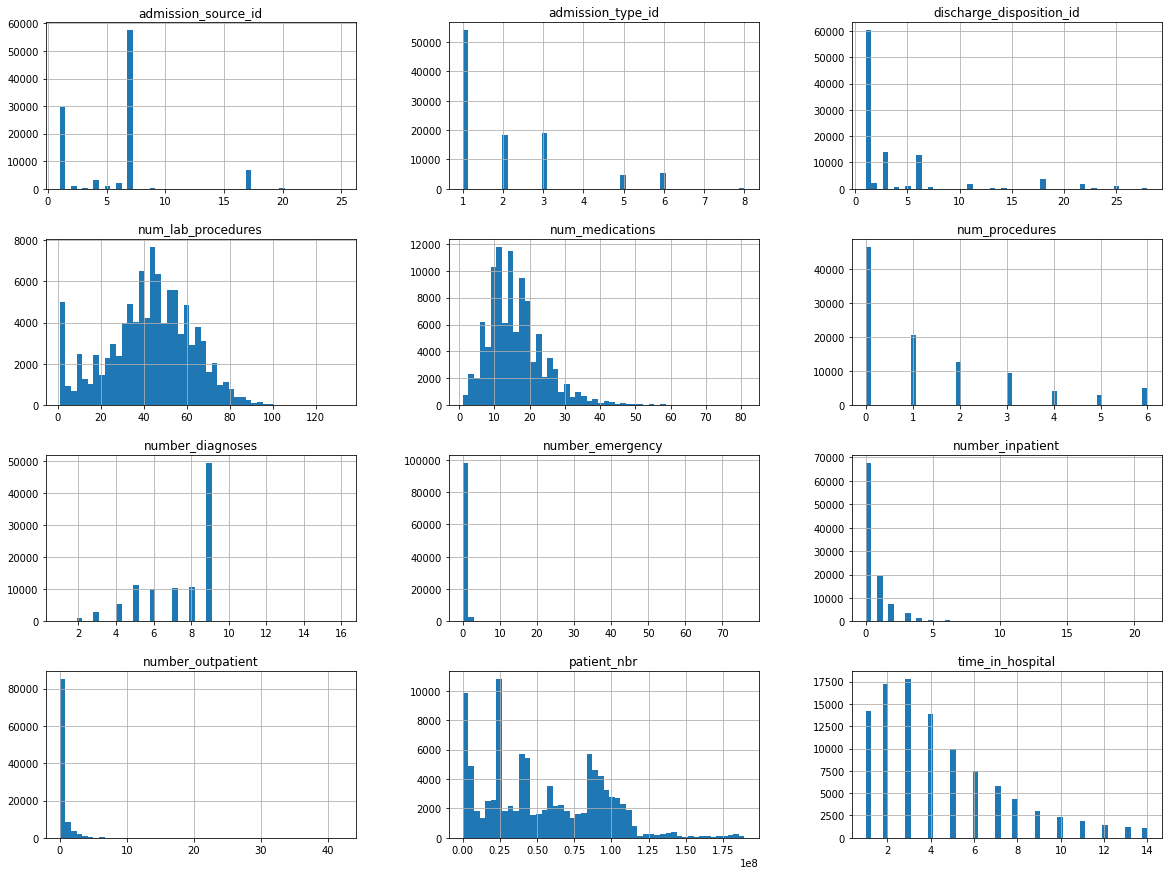

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
df1.hist(bins=50, figsize=(20,15))
plt.show()

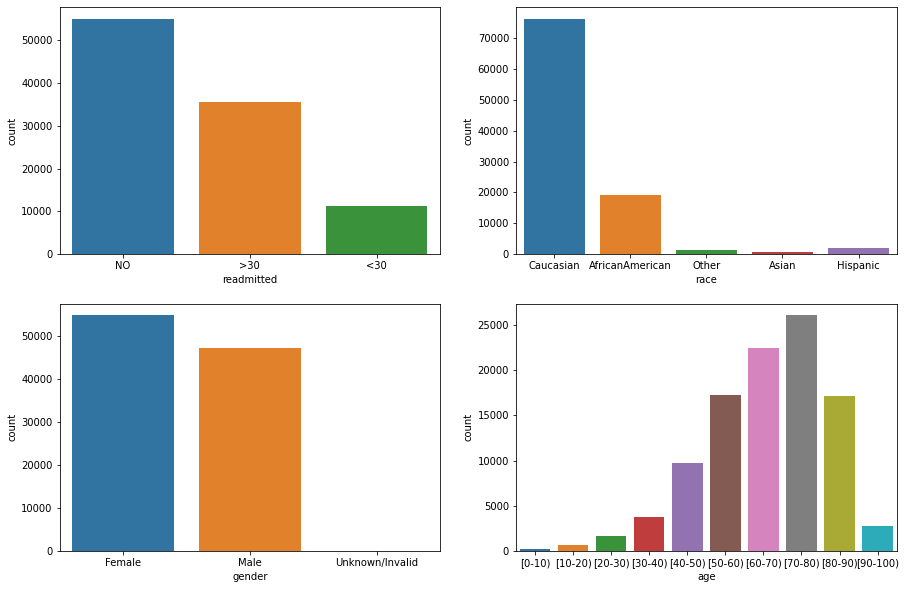

In [12]:
fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2)
sns.countplot(x="readmitted", data=df1, ax=ax[0][0])
sns.countplot(x="race", data=df1, ax=ax[0][1])
sns.countplot(x="gender", data=df1, ax=ax[1][0])
sns.countplot(x="age", data=df1, ax=ax[1][1])

In [13]:
df = df[((df.discharge_disposition_id != 11) & 
         (df.discharge_disposition_id != 13) &
         (df.discharge_disposition_id != 14) & 
         (df.discharge_disposition_id != 19) & 
         (df.discharge_disposition_id != 20) & 
         (df.discharge_disposition_id != 21))] 

In [14]:
icd9code = [(1, 139),
            (140, 239),
            (240, 279),
            (280, 289),
            (290, 319),
            (320, 389),
            (390, 459),
            (460, 519),
            (520, 579),
            (580, 629),
            (630, 679),
            (680, 709),
            (710, 739),
            (740, 759),
            (760, 779),
            (780, 799),
            (800, 999)]
icd9codelist = ['Infectious and parasitic diseases',
                'Neoplasms',
                'Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders',
                'Diseases Of The Blood And Blood-Forming Organs',
                'Mental Disorders',
                'Diseases Of The Nervous System And Sense Organs',
                'Diseases Of The Circulatory System',
                'Diseases Of The Respiratory System',
                'Diseases Of The Digestive System',
                'Diseases Of The Genitourinary System',
                'Complications Of Pregnancy, Childbirth, And The Puerperium',
                'Diseases Of The Skin And Subcutaneous Tissue',
                'Diseases Of The Musculoskeletal System And Connective Tissue',
                'Congential Anomalies',
                'Certain Conditions Originating In The Perinatal Period',
                'Symptoms, Signs, And Ill-Defined Conditions',
                'Injury And Poisoning']
codes = zip(icd9code, icd9codelist)
codelist = set(codes)

In [15]:
for num_range, diagnosis in codelist:
    oldlist = range(num_range[0], num_range[1]+1)
    oldlist = [str(x) for x in oldlist]
    newlist = [diagnosis] * len(oldlist)
    for col in ['diag_1', 'diag_2', 'diag_3']:
        df[col].replace(oldlist, newlist, inplace=True)
        
for col in ['diag_1', 'diag_2', 'diag_3']:
    df.loc[df[col].str.contains('V', na=False), col] = 'Supplementary Classification of Factors Influencing Health Status and Contact with Health Services'
    df.loc[df[col].str.contains('250', na=False), col] = 'Diabetes'
    df.loc[df[col].str.contains('E', na=False), col] = 'External Causes of Injuries and Poisonings'

In [16]:
df = df.drop(columns=['patient_nbr','weight', 'payer_code',"medical_specialty"])

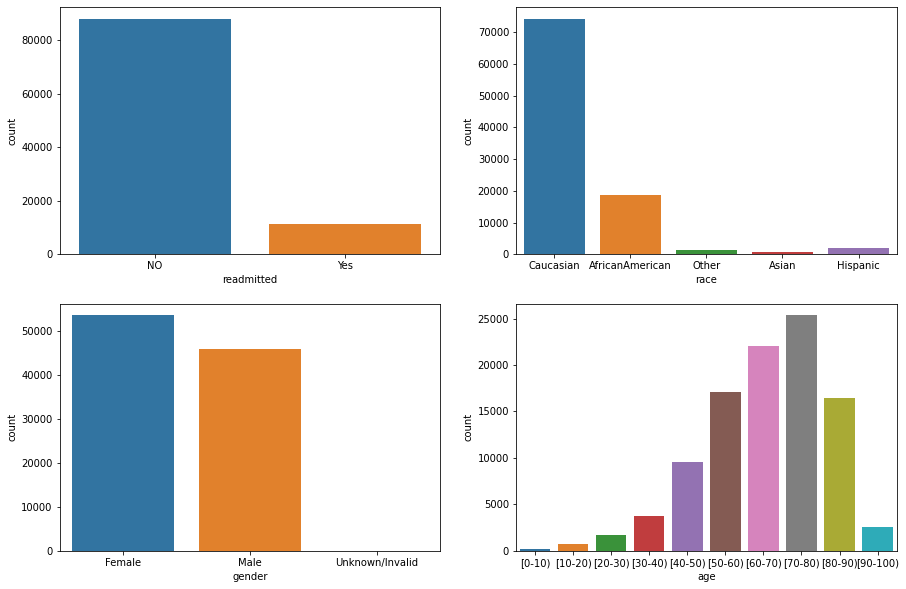

In [17]:
fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2)
sns.countplot(x="readmitted", data=df, ax=ax[0][0])
sns.countplot(x="race", data=df, ax=ax[0][1])
sns.countplot(x="gender", data=df, ax=ax[1][0])
sns.countplot(x="age", data=df, ax=ax[1][1])

In [18]:
df = df.dropna()


                          admission_type_id  discharge_disposition_id  \
admission_type_id                  1.000000                  0.089929   
discharge_disposition_id           0.089929                  1.000000   
admission_source_id                0.106133                  0.007893   
time_in_hospital                  -0.012613                  0.161386   
num_lab_procedures                -0.139159                  0.008855   
num_procedures                     0.132903                  0.011142   
num_medications                    0.082299                  0.104468   
number_outpatient                  0.025685                 -0.010879   
number_emergency                  -0.020117                 -0.025843   
number_inpatient                  -0.036797                  0.014057   
number_diagnoses                  -0.120784                  0.023194   

                          admission_source_id  time_in_hospital  \
admission_type_id                    0.106133         -0

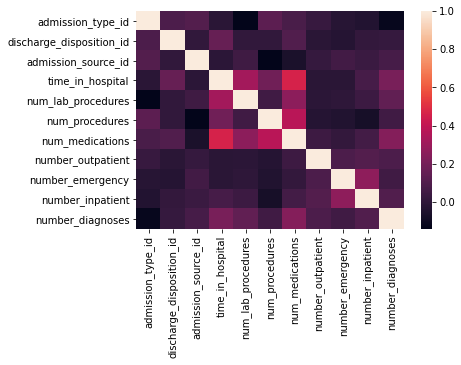

In [19]:
corr = df.corr(method="pearson")
print(corr)
sns.heatmap(corr)

In [20]:
df["readmitted"].describe()

count     95673
unique        2
top          NO
freq      84650
Name: readmitted, dtype: object

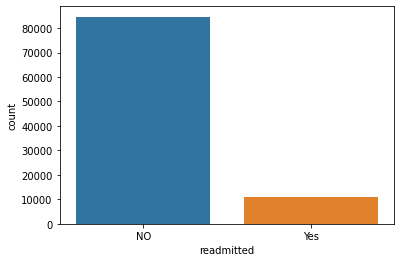

In [21]:
sns.countplot(df['readmitted'])
plt.show()

In [22]:
cat_columns = df.select_dtypes(['object']).columns
cat_columns_id = df.columns.get_indexer(cat_columns)
df[cat_columns] = df[cat_columns].astype('category')
df[cat_columns] = df[cat_columns].apply(lambda x : x.cat.codes)

In [23]:
data = df.to_numpy()
x, y = data[:, :-1], data[:, -1:]

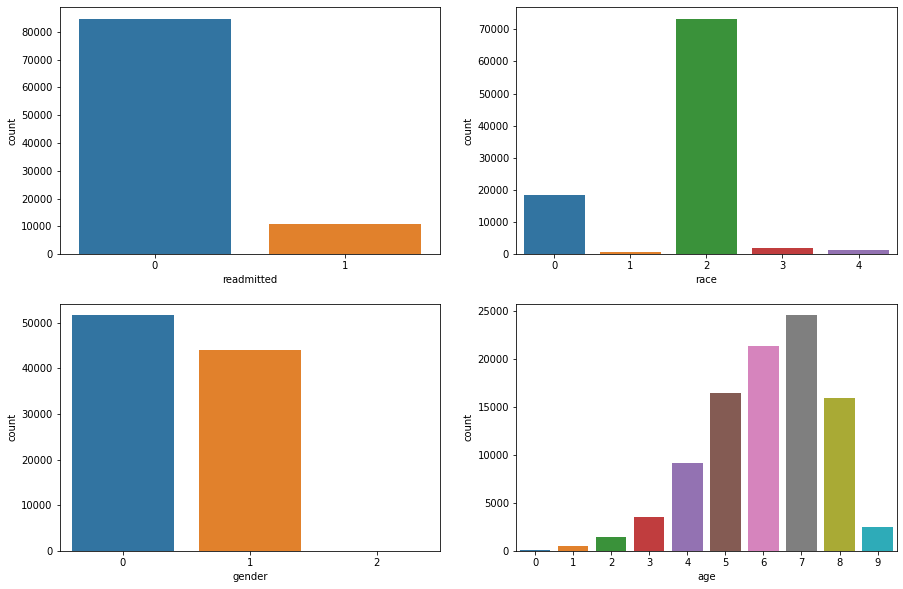

In [24]:
fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2)
sns.countplot(x="readmitted", data=df, ax=ax[0][0])
sns.countplot(x="race", data=df, ax=ax[0][1])
sns.countplot(x="gender", data=df, ax=ax[1][0])
sns.countplot(x="age", data=df, ax=ax[1][1])